### **Predicción de la actividad física realizada por usuarios de smartphones**

Se un dataset que contiene información sobre la actividad física registrada por los smartphones de usuarios. El dataset se obtuvo a través de un experimento con 30 voluntarios de entre 19 y 48 años. Cada persona realizó seis actividades: caminar hacia arriba, caminar abajo, estar sentado, de pie y tendido llevando un smartphone con ellos todo el tiempo. Usando el acelerómetro y giroscopio integrados, se capturó la aceleración lineal y velocidad angular en 3 ejes. El objetivo del análisis es el de realizar predicciones utilizando técnicas avanzadas de machine learning. 

Este codigo fue elaborado utilizando herramientas del curso, herramientas proporcionadas en clase e información recopilada por parte propia, así como también información recopilada por inteligencia artificial, como chat gpt y copilot.

El dataset se encuentra disponible en Kaggle: https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones

### **1. Importación de librerias y dataset**

Se importan las librerias a ser utilizadas y el dataset a analizar

In [62]:
# basicas 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# modelos
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
# cluster
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.metrics import roc_curve, auc
# reduccion 
from sklearn.decomposition import PCA
# deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from keras.layers import Input, Dense

In [2]:
# importar el dataset de train
df = pd.read_csv('train.csv')
df.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


Se importa el dataset de train para visualizar los datos. Tambien se importa el dataset de test con el mismo objetivo.

In [3]:
# importar el dataset de test
df_test = pd.read_csv('test.csv')
df_test.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


### **2. Exploración de los datos**

En esta sección se realiza una exploración de los datos. Se busca identificar los tipos de datos presentes y también detectar la presencia de valores nulos, con el objetivo de elegir una técnica de imputación adecuada en caso de ser necesaria.

### **2.1. Verificacion de tipo de datos**

In [4]:
# info del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


Los datos del dataset son mayoritariamente numéricos, de los cuales 561 son del tipo float, 1 es del tipo int y 1 es del tipo object. Se tiene disponible en total 7352 filas y 563 columnas.  

Con el objetivo de conocer mejor los datos, se filtran en particular los datos del tipo int y del tipo object.

In [5]:
# filtrar columnas de tipo int y object
filtered_df = df.select_dtypes(include=['int', 'object'])

# valores unicos de cada columna
unique_values = {col: filtered_df[col].unique() for col in filtered_df.columns}

# resultado
for col, values in unique_values.items():
    print(f"Columna: {col}")
    print(f"Valores únicos: {values}\n")

Columna: subject
Valores únicos: [ 1  3  5  6  7  8 11 14 15 16 17 19 21 22 23 25 26 27 28 29 30]

Columna: Activity
Valores únicos: ['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']



Se logra identificar que, los valores reconcidos como int corresponden a la variable denominada "subject", el cual hacer referencia a la persona que esta realizando la actividad. Recordemos que, el dataset fue construido utilizando un total de 30 personas para el experimento, asi que la columna "subject" vendria a ser como el identificador de esa persona en particular. Por otro lado, la variable "Activity" hace referencia a la actividad física llevada acabo por la persona, por ello se trata de una variable categórica. En particular, también ya se logró idenfiticar que los valores únicos de "Activity" no presenta inconsistencias categóricas.

### **2.2. Identificación de valores faltantes**

Se verifica la cantidad y porcentaje de valores faltantes en el dataframe, además de ser necesario se rellenan los datos faltantes.

In [6]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df.shape[0]-df.isnull().sum(axis=0)

# cantidad de datos que si son na
qna=df.isnull().sum(axis=0)

# proporcion de datos con na y sin na
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)

# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)

# filtrar solo los que tienen NA
na = na[na['Na en q'] > 0]

# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %


Con esta verificación, se concluye que no se observan valores faltantes en del dataframe.

### **2.3. Verificacion de valores duplicados**

Se procede a verificar si hay datos duplicados en el dataset.

In [7]:
# identificar duplicados
duplicados = df.duplicated()

# contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


El dataset no contiene datos duplicados.

### **2.4. Análisis exploratorio**

En esta sección, se busca revisar con detenimiento las columnas del dataset y así lograr identificar aquellas relacionadas con datos sensoriales. Recordemos que, las variables relacionadas con datos sensoriales incluyen las mediciones hechas con el acelerometro y giroscopio del smartphone.

In [8]:
# columnas del df
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [9]:
# describe
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


Como se menciono anteriormente, las columnas que estan relacionadas con datos sensoriales fueron extraidas utlizando el acelerometro y el giroscopio. Estos se encuentran codificados como "Acc" y "Gyro" en las columnas del dataset, por ello, se extraen estas columnas.

In [10]:
# filtrar
sensory_columns = [col for col in df.columns if 'acc' in col.lower() or 'gyro' in col.lower()]
# imprimir 
print("Variables sensoriales:")
for i, col in enumerate(sensory_columns, start=1):
    print(col, end=', ' if i % 5 != 0 else '\n')
if len(sensory_columns) % 5 != 0:
    print()

Variables sensoriales:
tBodyAcc-mean()-X, tBodyAcc-mean()-Y, tBodyAcc-mean()-Z, tBodyAcc-std()-X, tBodyAcc-std()-Y
tBodyAcc-std()-Z, tBodyAcc-mad()-X, tBodyAcc-mad()-Y, tBodyAcc-mad()-Z, tBodyAcc-max()-X
tBodyAcc-max()-Y, tBodyAcc-max()-Z, tBodyAcc-min()-X, tBodyAcc-min()-Y, tBodyAcc-min()-Z
tBodyAcc-sma(), tBodyAcc-energy()-X, tBodyAcc-energy()-Y, tBodyAcc-energy()-Z, tBodyAcc-iqr()-X
tBodyAcc-iqr()-Y, tBodyAcc-iqr()-Z, tBodyAcc-entropy()-X, tBodyAcc-entropy()-Y, tBodyAcc-entropy()-Z
tBodyAcc-arCoeff()-X,1, tBodyAcc-arCoeff()-X,2, tBodyAcc-arCoeff()-X,3, tBodyAcc-arCoeff()-X,4, tBodyAcc-arCoeff()-Y,1
tBodyAcc-arCoeff()-Y,2, tBodyAcc-arCoeff()-Y,3, tBodyAcc-arCoeff()-Y,4, tBodyAcc-arCoeff()-Z,1, tBodyAcc-arCoeff()-Z,2
tBodyAcc-arCoeff()-Z,3, tBodyAcc-arCoeff()-Z,4, tBodyAcc-correlation()-X,Y, tBodyAcc-correlation()-X,Z, tBodyAcc-correlation()-Y,Z
tGravityAcc-mean()-X, tGravityAcc-mean()-Y, tGravityAcc-mean()-Z, tGravityAcc-std()-X, tGravityAcc-std()-Y
tGravityAcc-std()-Z, tGravityAcc-m

In [11]:
# resultados
df[sensory_columns].head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.993755,-1.000000,-0.555556,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529


Se observa que 558 columnas estan asociadas a las mediciones sensoriales.

A continuacion se verifica el rango de datos de las columnas asociadas a los datos sensoriales. En particular, al tratarse de datos que contienen las velocidades en los 3 ejes del espacio (x,y,z), los valores deberian de estar en el rango de -1 a 1.

In [12]:
# calcular estadísticas descriptivas de las variables sensoriales
stats = df[sensory_columns].describe()

# imprimir las estadísticas relevantes
print("Estadísticas descriptivas de las variables sensoriales:")
print(stats.loc[['min', 'max', 'mean', 'std']])

Estadísticas descriptivas de las variables sensoriales:
      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
min           -1.000000          -1.000000          -1.000000   
max            1.000000           1.000000           1.000000   
mean           0.274488          -0.017695          -0.109141   
std            0.070261           0.040811           0.056635   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
min          -1.000000         -0.999873         -1.000000         -1.000000   
max           1.000000          0.916238          1.000000          1.000000   
mean         -0.605438         -0.510938         -0.604754         -0.630512   
std           0.448734          0.502645          0.418687          0.424073   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
min          -1.000000         -1.000000         -1.000000  ...   
max           0.967664          1.000000          1.000000  ...   
mean         -0.

Como se logra visualizar, los datos se encuentran en el rango especificado. Sin embargo, al tratarse de muchas columnas es dificil visualizar cada una de ellas. Asi, como se conoce el rango al cual deben pertencer, se extraen aquellas que estan fuera de rango. 

In [13]:
# variables fuera de rango
out_of_range = (df[sensory_columns] < -1).sum() + (df[sensory_columns] > 1).sum()

# filtrar
print("\nColumnas con valores fuera del rango esperado (-1 a 1):")
print(out_of_range[out_of_range > 0])


Columnas con valores fuera del rango esperado (-1 a 1):
Series([], dtype: int64)


Asi, se observa que las columnas se encuentran dentro del rango esperado. 

A continuacion, se procede a analizar las columnas que no estan asociadas a las mediciones sensoriales.

In [14]:
# columnas no sensoriales
non_sensory_columns = [col for col in df.columns if col not in sensory_columns]

# resultados
print("\nColumnas que no estan asociadas a mediciones sensoriales:")
for i, col in enumerate(non_sensory_columns, start=1):
    print(col, end=', ' if i % 5 != 0 else '\n')
if len(non_sensory_columns) % 5 != 0:
    print()


Columnas que no estan asociadas a mediciones sensoriales:
angle(X,gravityMean), angle(Y,gravityMean), angle(Z,gravityMean), subject, Activity


Las columnas que no estan asociadas a mediciones sensoriales son 5, entre las cuales esta el idenfiticador del usuario (subject), la actividad realizada (activity) y los angulos medios en cada eje (x,y,z). De la misma forma, tambien se procede a verificar el rango de datos de los angulos, ya que anteriormente ya se habia revisado las columnas "Activity" y "subject".

In [15]:
# resultados
df[non_sensory_columns].head(3)

,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,-0.841247,0.179941,-0.058627,1,STANDING
1,-0.844788,0.180289,-0.054317,1,STANDING
2,-0.848933,0.180637,-0.049118,1,STANDING


In [16]:
# extraer numericos
non_sensory_numeric = ['angle(X,gravityMean)', 'angle(Y,gravityMean)', 'angle(Z,gravityMean)']

# estadísticas descriptivas de las variables no sensoriales
stats = df[non_sensory_numeric].describe()

# Imprimir las estadísticas relevantes
print("Estadísticas descriptivas de las variables no sensoriales:")
print(stats.loc[['min', 'max', 'mean', 'std']])

Estadísticas descriptivas de las variables no sensoriales:
      angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)
min              -1.000000             -1.000000             -1.000000
max               1.000000              0.478157              1.000000
mean             -0.489547              0.058593             -0.056515
std               0.511807              0.297480              0.279122


In [17]:
# valores fuera del rango [-1, 1] 
out_of_range = (df[non_sensory_numeric] < -1).sum() + (df[non_sensory_numeric] > 1).sum()

# resultados
print("\nColumnas no sensoriales con valores fuera del rango [-1, 1]:")
print(out_of_range[out_of_range > 0])


Columnas no sensoriales con valores fuera del rango [-1, 1]:
Series([], dtype: int64)


Tambien se logra verificar que las columnas que no estan asociadas a mediciones sensoriales, cuentan con los datos en el rango esperado que es de -1 a 1.

### **3. Análisis no supervisado**

Inicialmente se aplicará K-means, con el objetivo de identificar patrones de agrupación. 

### **3.1. Aplicacion de K-Means**

Se aplicara el metodo de clustering utilzando K-Means.

In [18]:
# df
df.head(5).T

,0,1,2,3,4
tBodyAcc-mean()-X,0.288585,0.278419,0.279653,0.279174,0.276629
tBodyAcc-mean()-Y,-0.020294,-0.016411,-0.019467,-0.026201,-0.01657
tBodyAcc-mean()-Z,-0.132905,-0.12352,-0.113462,-0.123283,-0.115362
tBodyAcc-std()-X,-0.995279,-0.998245,-0.99538,-0.996091,-0.998139
tBodyAcc-std()-Y,-0.983111,-0.9753,-0.967187,-0.983403,-0.980817
...,...,...,...,...,...
"angle(X,gravityMean)",-0.841247,-0.844788,-0.848933,-0.848649,-0.847865
"angle(Y,gravityMean)",0.179941,0.180289,0.180637,0.181935,0.185151
"angle(Z,gravityMean)",-0.058627,-0.054317,-0.049118,-0.047663,-0.043892
subject,1,1,1,1,1


Las variables utilizadas para el cluster serán todas a excepcion, a excepcion de "subject", ya que solo representa un identificador de persona. A parte de eso, también se excluye la variable "activity" ya que es una variable categórica. Esto se realiza porque K-means es un algoritmo basado en distancias, y generalmente las categorías no cuentan con una relación numérica que pueda ser útil para compararlo con variables numéricas.

In [19]:
# columnas a utilizar
x = df.drop(columns=['subject','Activity'])

Se aplicara una estandarización de las variables utilizando el MinMaxScaler, ya que como se ha visto anteriormente, la mayoria de los datos se encuentran dentro del rango de -1 a 1. 

In [20]:
# estandarizar los datos
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

Antes de aplicar K-means, se busca identificar el número de clusters óptimo para el dataset. 

c:\Users\Admin\miniconda3\envs\deep_learning\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Admin\miniconda3\envs\deep_learning\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


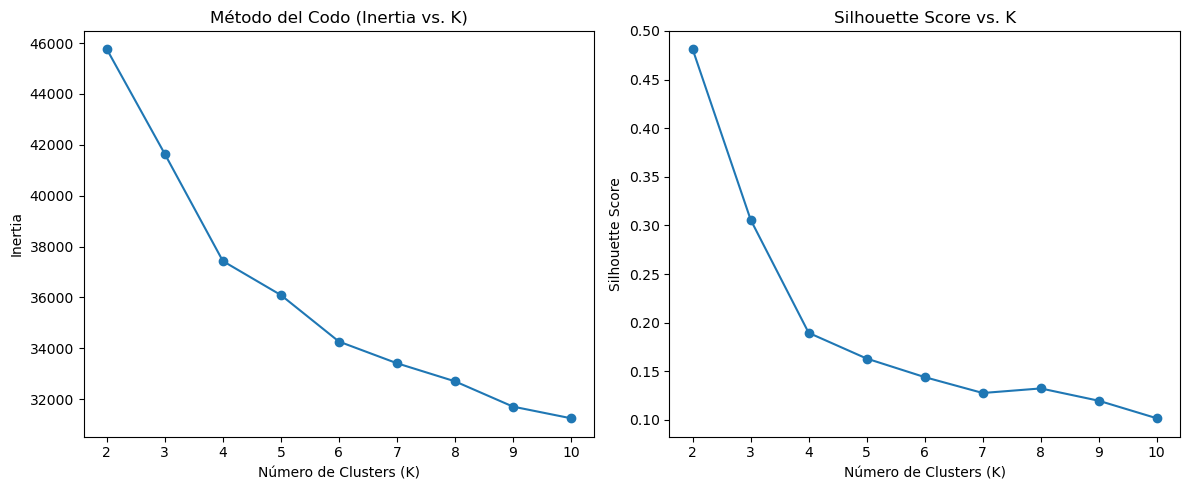

In [21]:
# scores para valores de K
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(x_scaled, kmeans.labels_))

# gráficos
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# inertia
ax[0].plot(k_values, inertia, marker='o')
ax[0].set_title('Método del Codo (Inertia vs. K)')
ax[0].set_xlabel('Número de Clusters (K)')
ax[0].set_ylabel('Inertia')
plt.grid()

# silhouette score
ax[1].plot(k_values, silhouette_scores, marker='o')
ax[1].set_title('Silhouette Score vs. K')
ax[1].set_xlabel('Número de Clusters (K)')
ax[1].set_ylabel('Silhouette Score')
plt.grid()

plt.tight_layout()
plt.show()

Según las métricas obtenidas utilizando el método del codo y siluete score, el número de clusters óptimo para este dataset es de aproximadamente 2 a 3 clusters. Se opta por utilizar un k=2, ya que según el gráfico del siluete score, con k=2 se tiene tendría que tener una mejor separación y una buena cohesión entre los grupos.

In [22]:
# KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(x_scaled)

KMeans(n_clusters=2, random_state=42)

In [23]:
# obtener las etiquetas de los clusters
kmeans_labels = kmeans.labels_

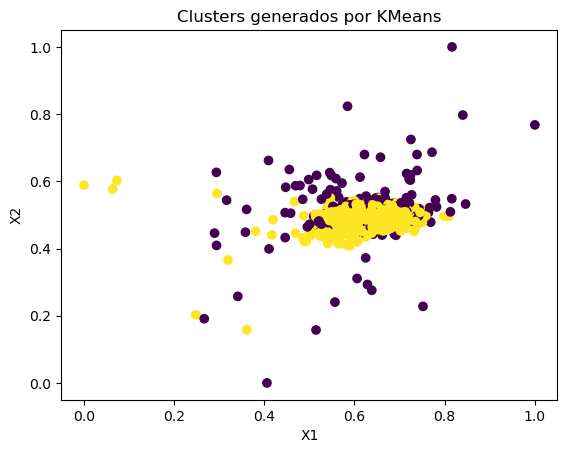

In [24]:
# resultados de los clusters
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("Clusters generados por KMeans")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

Aquí se puede observar que K-means ha logrado realizar una diferenciación de dos grupos principales en el dataset. Si bien, no se encuentra mucha distancia entre ellos, si se puede observar que hay diferenciación notoria entre ambos grupos. Otro punto a considerar es que el cluster coloreado en amarrillo es aparentemente más denso que el cluster coloreado en lila. Además, el cluster lila contiene datos un poco más dispersos y alejados de la región de alta densidad, lo que puede sugerir que este cluster tiene una mayor variabilidad y la posible presencia de outliers. 

In [25]:
# silhouette Score kmeans
kmeans_silhouette = silhouette_score(x_scaled, kmeans_labels)

# Calinski-Harabasz Index para kmeans
kmeans_calinski = calinski_harabasz_score(x_scaled, kmeans_labels)

# imprimir
print("KMeans Silhouette Score:", kmeans_silhouette)
print("KMeans Calinski-Harabasz Index:", kmeans_calinski)

KMeans Silhouette Score: 0.4811022921538455
KMeans Calinski-Harabasz Index: 9616.662417679245


Se calcularon las metricas siluete score y CH. La metrica de silute score es una medida de la calidad de la asignación de los puntos a los clusters generados, genealmente en el rango de -1 a 1. En este caso particular, el valor es de 0.48, lo que significa que se obtuvo una separación buena de los datos.

Por otro lado, la métrica de CH es otra métrica utilizada para evaluar la calidad de los clusters, generalmente los valores más altos de este índice que los clusters son densos y bien separados. Se tiene un valor de 9616, lo que es un valor alto y esto sugiere que los clusters generados por KMeans tienen una buena separación y son densos.

Asi mismo, de estas métricas se puede concluir que los clusters son diferentes entre sí y compactos dentro de sí mismos.

Se ha observado que en algunos trabajos que utilizan K-means, posteriormente se suele aplicar PCA para mejorar la visualización de los clusters generados en dos dimensiones. Así, se calcula K-means con la totalidad de los datos y al aplicar posteriormente PCA se reduce la dimensionalidad, y los clusters se pueden representar visualmente en un gráfico 2D o 3D, lo que facilita la interpretación.

In [26]:
# aplicar PCA para reducir la dimensionalidad 
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

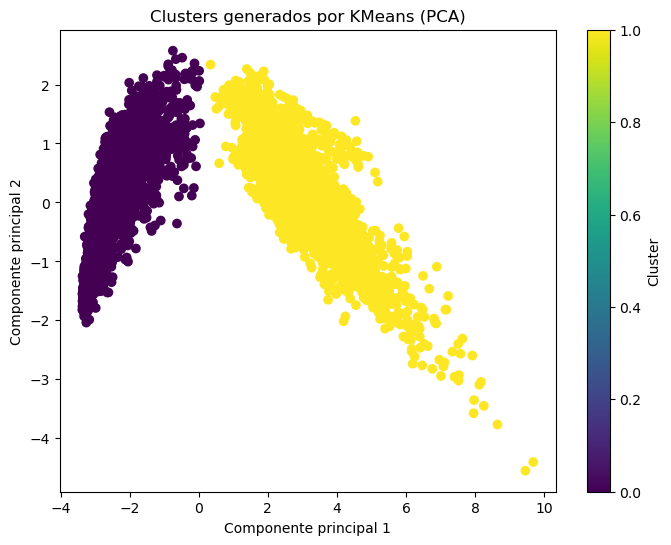

In [27]:
# grafico
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("Clusters generados por KMeans (PCA)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.colorbar(label='Cluster')
plt.show()

En este grafico tambien se observa lo discutido anteriormente. K-means realizo una buena separación de los datos en dos grupos bien definidos, los grupos son densos, y en particular el cluster coloreado de lila se ve más compacto que el coloreado de amarillo. 

### **4. Modelado con MLP**

A continuación se aplica un modelo MLP para predecir el tipo de actividad de los usuarios basados en los datos recopilados por sus smartphones. Asi, la variable target es activity y las demas variables son las predictoras. Recordemos tambien que los datos de test y train se encuentran separados en dos archivos distintos.

In [28]:
# df train
df.head(3).T

,0,1,2
tBodyAcc-mean()-X,0.288585,0.278419,0.279653
tBodyAcc-mean()-Y,-0.020294,-0.016411,-0.019467
tBodyAcc-mean()-Z,-0.132905,-0.12352,-0.113462
tBodyAcc-std()-X,-0.995279,-0.998245,-0.99538
tBodyAcc-std()-Y,-0.983111,-0.9753,-0.967187
...,...,...,...
"angle(X,gravityMean)",-0.841247,-0.844788,-0.848933
"angle(Y,gravityMean)",0.179941,0.180289,0.180637
"angle(Z,gravityMean)",-0.058627,-0.054317,-0.049118
subject,1,1,1


In [29]:
# df test
df_test.head(3).T

,0,1,2
tBodyAcc-mean()-X,0.257178,0.286027,0.275485
tBodyAcc-mean()-Y,-0.023285,-0.013163,-0.02605
tBodyAcc-mean()-Z,-0.014654,-0.119083,-0.118152
tBodyAcc-std()-X,-0.938404,-0.975415,-0.993819
tBodyAcc-std()-Y,-0.920091,-0.967458,-0.969926
...,...,...,...
"angle(X,gravityMean)",-0.720009,-0.698091,-0.702771
"angle(Y,gravityMean)",0.276801,0.281343,0.280083
"angle(Z,gravityMean)",-0.057978,-0.083898,-0.079346
subject,2,2,2


Se elige como variable target a "activity", dejando a las demas variables como predictoras.

In [30]:
# separacion de variables para el conjunto de train
x_train = df.drop(columns=['Activity'])
y_train = df['Activity']

In [31]:
# separacion de variables para el conjunto de test
x_test = df.drop(columns=['Activity'])
y_test = df['Activity']

Se aplican los escalamientos para ambos set de datos.

In [32]:
# escaler
scaler = StandardScaler()

# se escalan los datos 
# fit transform para train
X_train_scaled = scaler.fit_transform(x_train)

# transform para test
X_test_scaled = scaler.transform(x_test)

Se agrega tambien el encoder para las variables categoricas, que en este caso es "Activity"

In [33]:
# encoder
encoder = OneHotEncoder()

# se codifican los datos
# fit transform para train
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# transform para test
y_test_encoded = encoder.fit_transform(y_test.values.reshape(-1, 1))

Una vez preprocesado los datos, se crea el modelo MLP. Se utiliza input, especificando la forma de los datos de entrada. La primera capa oculta cuenta con 128 neuronas, ya que el dataset contiene mas de 500 datos de entrada, ademas se opta por la funcion de activación ReLu, por ser más eficiente computacionalmente. En la segunda capa oculta se reduce a 64 neuronas y nuevamente se aplica la función ReLu. La capa de salida devuelve el número de clases del problema, es decir, 6 clases. Como el problema es del tipo multiclase, se opta por la funcion softmax, que convierte las salidas en probabilidades  

In [34]:
# modelo mlp
model_mlp = Sequential([
    Input(shape=(x_train.shape[1],)),
    # capa de entrada
    Dense(128, activation='relu'),  
    Dense(64, activation='relu'),
    # capa de salida
    Dense(y_train_encoded.shape[1], activation='softmax')  
])

In [35]:
# resumen del modelo
model_mlp.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        72,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,710 (315.27 KB)

 Trainable params: 80,710 (315.27 KB)

 Non-trainable params: 0 (0.00 B)

A continuacion se compila el modelo. Considerando la eficiencia se opto por Adam, que es un algoritmo que ajusta los pesos del modelo durante el entrenamiento con el objetivo de minimizar la funcion de perdida. Para la funcion de pérdida se optó por categorical_crossentropy, que suele ser utilizado en problemas de clasificación multiclase además de ser compatible con softmax. Por último, la métrica seleccionada fue la de accuracy porque es la adecuada para un problema de clasificación multiclase.

In [36]:
# compilar
model_mlp.compile(optimizer=Adam(),  
            loss='categorical_crossentropy', 
            metrics=['accuracy'])  

Al utilizar one hot encoder se generan matrices dispersas, y tensorFlow/Keras espera que las etiquetas estén en un formato denso (matriz NumPy) donde todos los valores, incluidos los ceros, estén explícitamente representados. Por esa razon, se procede a convertir los datos en matrices densas.

In [37]:
# convertir
y_train_dense = y_train_encoded.toarray()  
y_test_dense = y_test_encoded.toarray() 

A continuacion se entrena el modelo. Se utilizaran 10 epocas, que serian 10 veces en las cuales el modelo recorreria todo el conjunto de datos. El valor de batch_size será de 32 y los datos de validación serán los datos del conjunto de test.

In [38]:
# entrenar el modelo
history = model_mlp.fit(X_train_scaled, y_train_dense, 
                        epochs=10, batch_size=32, 
                        validation_data=(X_test_scaled, y_test_dense))

Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8464 - loss: 0.4082 - val_accuracy: 0.9344 - val_loss: 0.1566
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9646 - loss: 0.0866 - val_accuracy: 0.9774 - val_loss: 0.0562
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9770 - loss: 0.0568 - val_accuracy: 0.9830 - val_loss: 0.0484
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9825 - loss: 0.0466 - val_accuracy: 0.9910 - val_loss: 0.0284
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9838 - loss: 0.0415 - val_accuracy: 0.9743 - val_loss: 0.0605
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9854 - loss: 0.0397 - val_accuracy: 0.9956 - val_loss: 0.0163
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9906 - loss: 0.0256 - val_accuracy: 0.9876 - val_loss: 0.0296
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9899 - loss: 0.0245 - val_accuracy: 0.

Se evalua el rendimiento del modelo en el conjunto de test.

In [39]:
# evaluar 
test_loss, test_accuracy = model_mlp.evaluate(X_test_scaled, y_test_dense)
print(f"Accuracy on test data: {test_accuracy*100:.2f}%")

230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9938 - loss: 0.0166
Accuracy on test data: 99.28%


Se obtuvo alrededor de 99% de exactitud en el dataset. A continuación se realizan predicciones.

In [52]:
# hacer predicciones
y_pred_train = model_mlp.predict(X_train_scaled)
y_pred_test = model_mlp.predict(X_test_scaled)

230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step


Como el modelo devuelve las probabilidades de pertenencia para cada clase, a continuacion se extraen para cada fila, la mayor probabilidad de pertenencia. 

In [54]:
# extraer pbb mayor de cada fila
y_pred_train_classes = np.argmax(y_pred_train, axis=1)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)

# etiquetas de prueba a clases
y_test_classes = np.argmax(y_test_dense, axis=1)

In [55]:
# matriz de Confusión
conf_matrix = confusion_matrix(y_test_classes, y_pred_test_classes)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[1407    0    0    0    0    0]
 [   0 1277    9    0    0    0]
 [   0   44 1330    0    0    0]
 [   0    0    0 1226    0    0]
 [   0    0    0    0  986    0]
 [   0    0    0    0    0 1073]]


In [57]:
# funcion para graficar la matriz de confusion
def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Etiqueta real')
    plt.xlabel('Etiqueta predicha')
    plt.show()

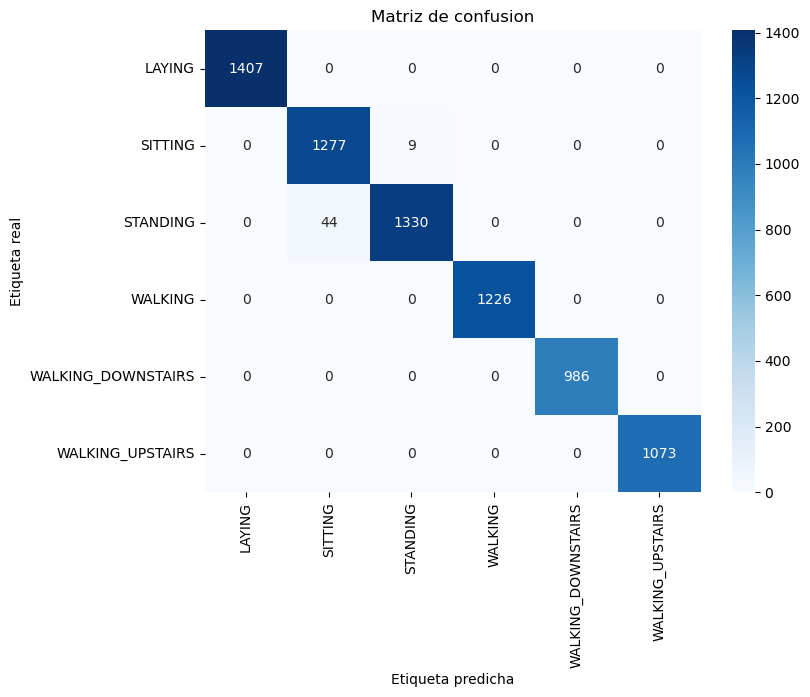

In [58]:
# extraer las clases
classes = np.sort(np.unique(y_test))

# graficar la matriz
plot_confusion_matrix(conf_matrix, classes, title="Matriz de confusion")

Con esta matriz de confusion, se puede observar que el modelo realiza muy buenas predicciones en la mayoria de los casos. En particular, la cantidad de clases que fueron etiquetadas de manera incorrecta suman solo 54 etiquetas, el resto fue clasificado correctamente.

In [60]:
# clases en test
y_pred_test_classes = np.argmax(model_mlp.predict(X_test_scaled), axis=1)

# convertir a su formato original
y_test_classes = np.argmax(y_test_dense, axis=1)

# clasification report
accuracy = accuracy_score(y_test_classes, y_pred_test_classes)
print(f'Exactitud: {accuracy:.2f}')

# resultados
print('Informe de Clasificación:')
print(classification_report(y_test_classes, y_pred_test_classes))

230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Exactitud: 0.99
Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1407
           1       0.97      0.99      0.98      1286
           2       0.99      0.97      0.98      1374
           3       1.00      1.00      1.00      1226
           4       1.00      1.00      1.00       986
           5       1.00      1.00      1.00      1073

    accuracy                           0.99      7352
   macro avg       0.99      0.99      0.99      7352
weighted avg       0.99      0.99      0.99      7352



En general, el modelo realizó muy buenas predicciones, con una exactitud del 99% sobre el set de datos. 

A continuacion se grafica la curva roc.

230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


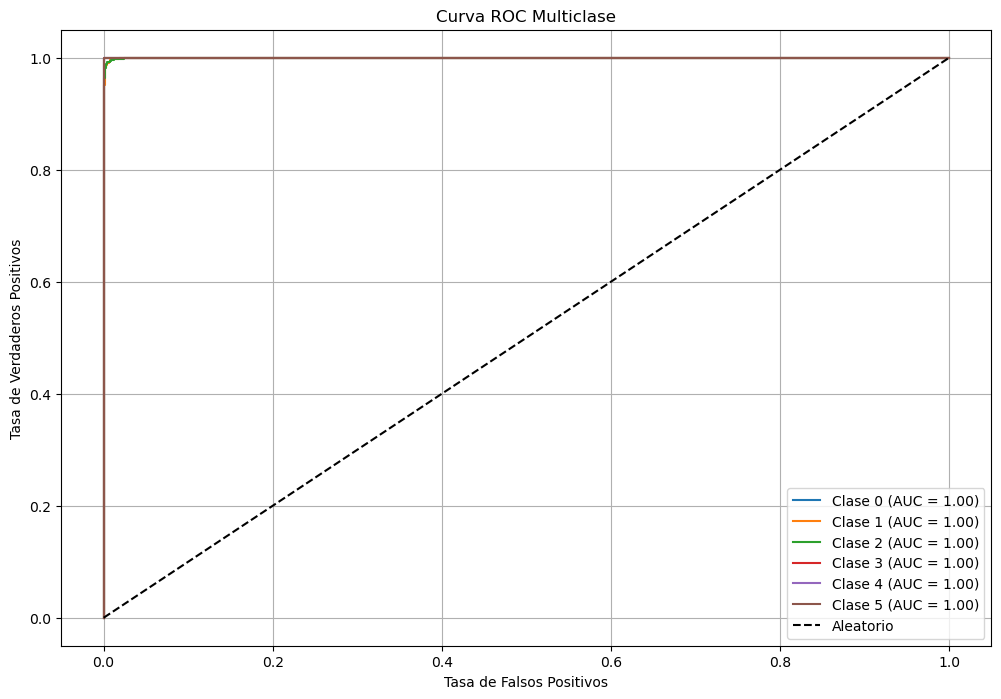

In [63]:
# etiquetas a binario
y_test_bin = label_binarize(y_test_classes, classes=np.unique(y_test_classes))

# pbb de predicciones
y_pred_prob = model_mlp.predict(X_test_scaled)

# numero de clases
n_classes = y_test_bin.shape[1]

# grafico
plt.figure(figsize=(12, 8))

# curva para cada clase 
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    # area bajo la curva
    roc_auc = auc(fpr, tpr)  
    # curva
    plt.plot(fpr, tpr, label=f'Clase {i} (AUC = {roc_auc:.2f})')

# linea diagonal
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')

# configuracion del grafico
plt.title('Curva ROC Multiclase')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Asi como las metricas lo estuvieron mostrando, la curva ROC muestra un valor de 1 para las clases, esto significa que el modelo realiza muy buenas predicciones.

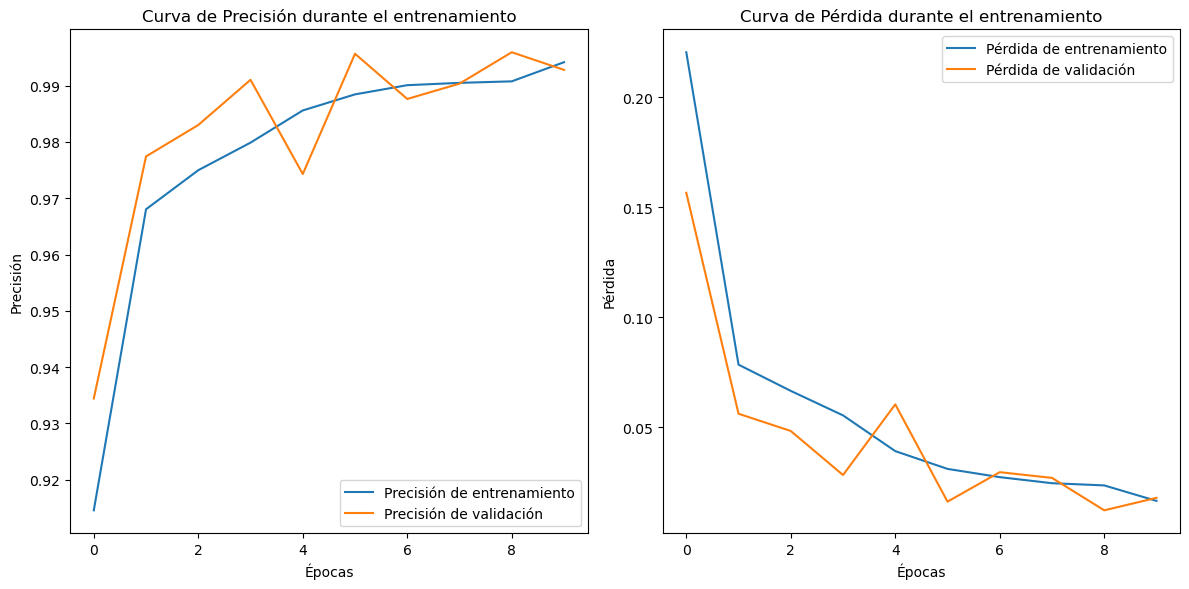

In [47]:
# Graficar la evolución de la precisión
plt.figure(figsize=(12, 6))

# Precisión en el conjunto de entrenamiento y validación
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Curva de Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Graficar la evolución de la pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Curva de Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Mostrar las gráficas
plt.tight_layout()
plt.show()


El primer grafico muestra la curva de precisión durante el entrenamiento vs la curva de precisión de validación. Se observa que ambas curvas mejoran a medida que aumentan las epocas, en particular, la curva de precisión llega a tener ciertas fluctuaciones, pero en la visión general, sigue aumentando a medida que aumentan las épocas. Al final del gráfico convergen a 0.99, sugieriendo que el modelo realiza muy buenas predicciones. 

El gráfico de la derecha muestra lo mismo pero para el caso de la pérdida durante el entrenamiento. Ambas curvas nuevamente muestran que las pérdidas van disminuyendo a medida que aumentan las épocas, ya que el modelo va reduciendo los errores. Por otra parte, también se observa una convergencia al valor mínimo cuando finaliza la gráfica, es decir el modelo redujo bastante bien los errores. 

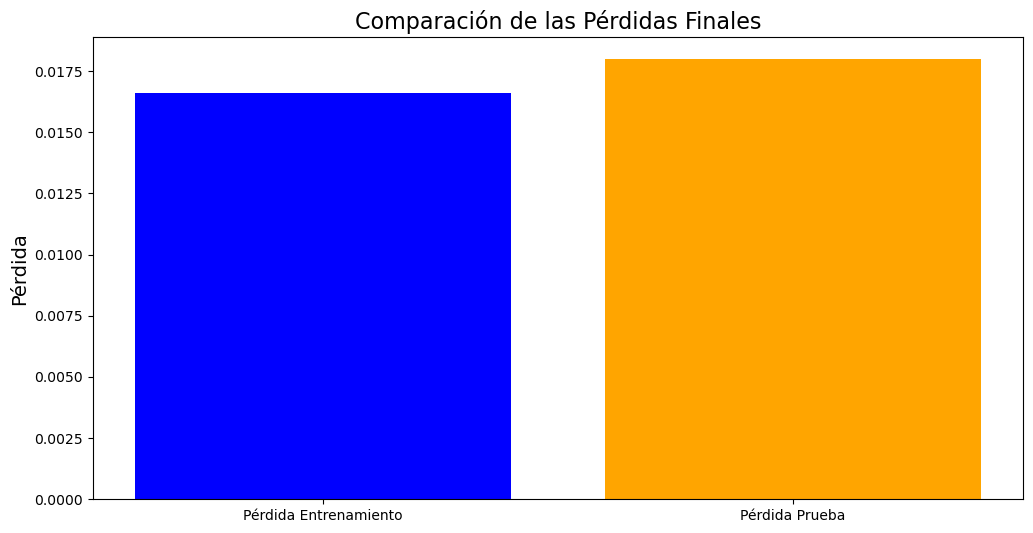

In [ ]:
# comparación de pérdidas finales
plt.figure(figsize=(12, 6))
final_losses = [history.history['loss'][-1], history.history['val_loss'][-1]]
plt.bar(["Pérdida Entrenamiento", "Pérdida Prueba"], final_losses, color=["blue", "orange"])
plt.title("Comparación de las Pérdidas Finales", fontsize=16)
plt.ylabel("Pérdida", fontsize=14)
plt.show()

Con este gráfico se observan las pérdidas en el conjunto test y de train. En general, se observa que la pérdida en entrenamiento en ligeramente menor que las pérdidas en prueba, pero no es muy significativo, razón por la cual se puede concluir que el modelo está realizando buenas generalizaciones y predicciones de los datos. 

### **5. Discusión y resultados**

En el presente trabajo se realizó un análisis de los datos de movimiento de 30 personas recopilados por smartphones, utilizando los acelerométros y giroscopios incorporados. Estas personas realizaron ciertas actividades y las mismas fueron predichas utilizando técnicas avanzadas de machine learning. 

Inicialmente se realzó un análisis exploratorio de los datos, identificando la cantidad de datos disponibles. Se trata de un dataset muy grande, ya se que disponian de mas de 500 columnas de datos para cada fila. El dataset esta compuesto principalmente de datos numericos, ya que los mismos eran datos asociados a velocidad y varian en un rango de -1 a 1. Tambien se tenia la variable cateogorica "Activity" que era el identificador de la actividad que se estaba realizando. 

Posterior al análisis, se busco hacer agrupaciones de los datos utilizando K-means. Este algoritmo se encuentra basado en distancias, y considerando las métricas de siluete score y el método del codo se puede ver que los datos se agrupan bien dos grupos, que se encuentran bien definidos. Esto sugiere que el comportamiento de las personas se divide facilmente en dos grupos, uno con actividades físicas más recurrentes y otro con actividades físicas menos recurrentes. LO que sugiere que naturalmente las personas de agrupan en dos grupos bien definidos, actividades de movimiento y actividades estáticas. 

Luego, los datos fueron utilizados para entrenar un modelo MLP, donde se obtuvo un muy buen rendimiento de los datos y por tanto se puede considerar que dicho modelo es adecuado para este set de datos. 